In [5]:
#indepdent sdes implimentation 
import numpy as np
from model_2point import *




phiA= 0.5
phiB = 1-phiA
chi = 100.0
rho0 = 10.0
nx = 5000
zA = 1.0
zB = 1.0
tmax = 100.0
dt = 0.1
zetalist = [0.0,0.001,0.01,0.1,1,10,100]

# Generate arrays of complex numbers
wplus = np.random.normal(0, 1, nx) + 0j * np.random.normal(0, 1, nx)
wplus = wplus-np.mean(wplus)
wminus = np.random.normal(0, 1, nx) + 0j * np.random.normal(0, 1, nx)
w0 = np.vstack((wplus,wminus)).T
lambda_plus = 1.0
lambda_minus = 1.0
# _model = model(chi,rho0,ensemble='grand')
# _model.init_grandcanonical(zA,zB)

ensemble = 'canonical'


_model = model(chi,rho0,ensemble=ensemble)
if ensemble == 'canonical':
    _model.init_canonical(phiA)
elif ensemble == 'grand':
    _model.init_grandcanonical(zA,zB)



#model.dHw(w)

model_list = [_model.dHdw_compressible,_model.dHdw_weakcompressible,_model.dHdw_incompressible]
lambdat = np.array([lambda_plus,lambda_minus])
wlist = []
corrlist = []
for base in model_list:
    sde = sde_int(w0,base,_model.wick,ensemble=ensemble)
    w,t, = sde.Euler_Maruyama(tmax,dt,lambdat,SCFT = False)
    corrlist.append(_model.getCorrelation_list(w))
    print(np.sum(_model.getDensity(w[-1])[0]))

wlist_zeta = []
corrlist_zeta = []
for zeta in zetalist:
    print(zeta)
    sde = _model.init_weakcompressible(zeta)

    sde = sde_int(w0,_model.dHdw_weakcompressible,_model.wick,ensemble=ensemble)
    w,t, = sde.Euler_Maruyama(tmax,dt,lambdat,SCFT = False)
    print(np.sum(_model.getDensity(w[-1])[0]))
    corrlist_zeta.append(_model.getCorrelation_list(w))

(11.990365050145762+2.899445928778289j)
(9.19172370280883-4.364836358276283j)
(10.001317192835568-1.0576656686503647j)
0.0
(10.150715470563277+1.7137187336427928j)
0.001
(9.215354568194535-3.6992839926949497j)
0.01
(9.558389741539687-5.4192571825214575j)
0.1
(8.535095072302463+5.901175306042141j)
1
(10.103057994010694+2.009754674247352j)
10
(9.893326994717002+1.5778417566064094j)
100
(8.138179112945316-6.291828834244337j)


2.8056687428271693e-05
2.804199622467104e-05
2.733422656692106e-05
(-0.0009655345481664307+3.057636068502831e-07j)
(-0.000926043985448445+2.0203175086920425e-05j)
(-0.0009639457882894027+9.289730304109567e-07j)


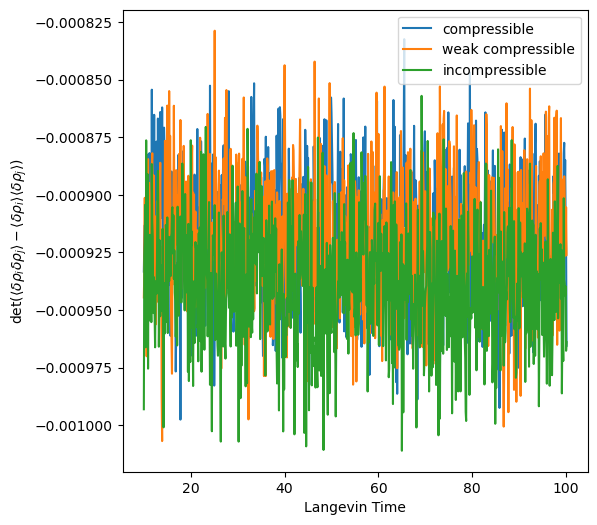

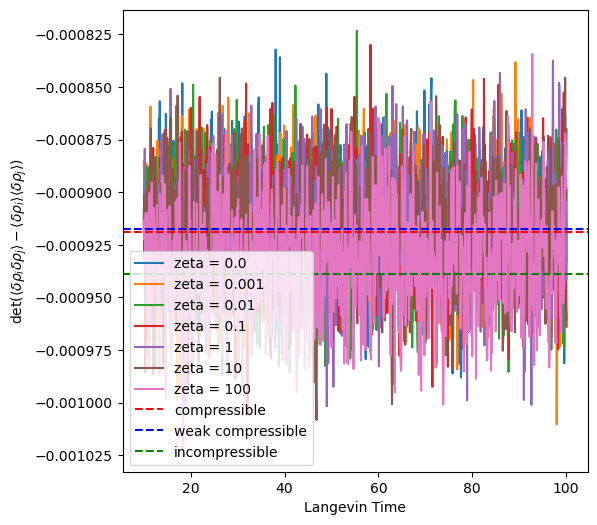

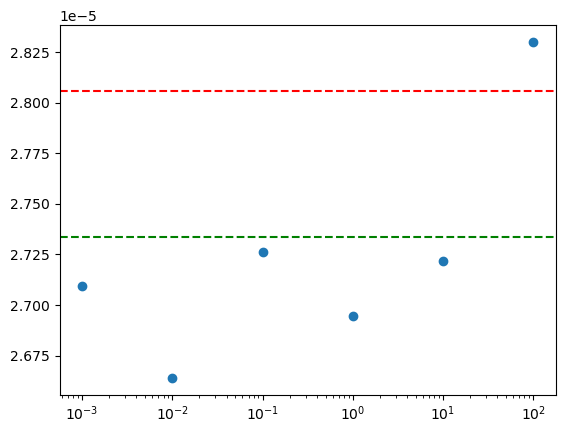

In [6]:
#process data get density profiles over time
# plot <density^2>-<density>^2
offset = 100
label = ['compressible','weak compressible','incompressible']
import matplotlib.pyplot as plt
plt.figure(figsize = (6,6))
for i, corr in enumerate(corrlist):
    corr = np.array(corr)
    correlator = np.linalg.det(corr[offset:,:,:])
    print(np.std(correlator))

    plt.plot(t[offset:],np.linalg.det(corr[offset:,:,:]),label = label[i])
plt.legend()
plt.xlabel('Langevin Time')
plt.ylabel(r'$\det( \left<\delta\rho_i \delta\rho_j\right>-\left<\delta\rho_i\right> \left< \delta\rho_j\right>)$')
# plt.ylim(-1.0,1.0)



plt.figure(figsize = (6,6))
val = []
for i in range(len(corrlist_zeta)):
    corr = np.array(corrlist_zeta[i])
    correlator = np.linalg.det(corr[offset:,:,:])
    val.append(np.std(correlator)) 
    plt.plot(t[offset:],np.linalg.det(corr[offset:,:,:]),label = 'zeta = '+str(zetalist[i]))


color = ['r','b','g']
vals = []
for i, corr in enumerate(corrlist):
    corr = np.array(corr)
    correlator = np.linalg.det(corr[offset:,:,:])
    print(np.linalg.det(corr[-1,:,:]))
    vals.append(np.std(correlator))

    plt.axhline(np.mean(np.linalg.det(corr[offset:,:,:])),label = label[i],linestyle = '--',color = color[i])

plt.legend()
plt.xlabel('Langevin Time')
plt.ylabel(r'$\det( \left<\delta\rho_i \delta\rho_j\right>-\left<\delta\rho_i\right> \left< \delta\rho_j\right>)$')
# plt.ylim(-1.0,1.0)
    # plt.plot(t,corr[:,1,1])
plt.figure()
plt.scatter(zetalist,val)   
plt.axhline(vals[0],label = label[0],linestyle = '--',color = color[0])
plt.axhline(vals[-1],label = label[-1],linestyle = '--',color = color[-1])

plt.xscale('log') 